# Задание 3: Исследование эффективности алгоритмов сортировок для различных структур и размерностей данных
## Метод Шелла с собственным алгоритмом изменения числа серий
Сортировка Шелла (англ. Shell sort) — алгоритм сортировки, являющийся усовершенствованным вариантом сортировки вставками. 

Идея метода Шелла состоит в сравнении элементов, стоящих не только рядом, но и на определённом расстоянии друг от друга. При сортировке Шелла сначала сравниваются и сортируются между собой значения, стоящие один от другого на некотором расстоянии `d`. После этого процедура повторяется для некоторых меньших значений `d`, а завершается сортировка Шелла упорядочиванием элементов при `d=1` (то есть обычной сортировкой вставками). 

Реализуем сортировку Шелла, используя шаги (gaps) сортировки, соответствующие факториалам, меньшим размера массива.

### Импорт необходимых библиотек:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from tqdm import tqdm_notebook
import timeit

### Реализация нахождения множества факториалов, меньших числа
По заданию необходимо реализовать собственный алгоритм изменения числа серий, через которые сортировка Шелла будет проходить по неотсортированному массиву. Эврестически доказано, что наибольшую эффективность показывают шаги, приближенные по соотношению к эспоненциальному росту  значений внутри последовательности, так, например, экспериментально найденная последовательность Марцина Циура $(1, 4, 10, 23, 57, 132, 301, 701, 1750)$ показывает наилучший из известных результатов на множестве элементов, меньшем 4000 по силе. Легко заметить, что приблизительно последовательнсть показывает экспоненциальный рост используемых значений. Поскольку планируется рассматривать массивы чисел, по размеру многократно превышающие 4000, имеет смысл рассматривать такую последовательность,которая сможет соответствующе резко возрастать для увеличивающихся значений массива. 

Таким образом, нам следует найти функцию, которая экспоненциально возрастает на малых размерах, а затем возрастает еще большими темпами. Также эта функция должна быть дискретно-разделимой, то есть можно получить ее целочисленные значения или целочисленное приближение. Помимо того, крайне желательно, чтобы вычисление этой функции не представляло особой математической или вычислительной сложности, поскольку эта последовательность будет расчитываться каждй раз перед сортировкой, а значит вычислительно сложные функции существенно снизят скорость алгоритма, что недопустимо. 

На основании вышеперечисленных условий была предпринята попытка рассматривать последовательность факториалов как множества шагов для сортировки Шелла, поскольку наибольший интерес составляет производительность сортировки на больших размерах массива (к примеру, 5000, 30000, 100000 элементов). Скорость возрастания факториала, превышающая скорость возрастания экспоненты, позволяет сортировке более эффективно отсортировывать массив на чрезвычайно больших объемах данных, поскольку такой подход, фактически, будет делить массив на частично отсортированные куски, в то время как меньшие шаги будут работать локально на таких подмассивах. 

Функция представляет собой последовательное вычисление факториалов, начиная с $1, 2, 6...$ и так далее до некоторого числа $n!$, при этом $n! < k$, где $k$ - мощность сортируемого массива. Максимальный шаг $n!$, меньший $k$, позволяет проходить по массиву величиной $k$ с эффективным делением массива.

Прогнозируемая эффективность алгоритма - $O(n^{\frac{3}{2}})$, с ускорением до $O(n)$ в особых случаях, когда перестановки не требуются. В целом, это средняя эффективность для типичных последовательностей шагов в сортировке Шелла. На различных видах данных такое разбиение шагов может быть как более, так и менее эффективным по сравнению с другими способами. Ожидается, что такой вид разбиения будет более эффективен при больших объемах данных (>10000 элементов).

Подобное исследование было проведено с поседовательностью чисел Фибоначчи, но факториальный рост шага показал себя более эффективным на больших объемах данных, в связи с чем было принято использовать именно последовательность факториалов.

В завершение отметим, что функция возвращает последовательность факториалов в _обратном_ порядке. Это было сделано для того, чтобы при возвращении значения функции эта последовательность без последующих преобразований использовалась для итерации. Очевидно, что использование шагов в сортировке должно идти от больших шагов к малым.

In [2]:
def factorial_sequense(cap):
    value = 1
    i = 1
    seq = []
    while (value < cap):
        seq.append(value)
        i += 1
        value *= i
    return seq[::-1]

### Реализация сортировки с заданным факториальным шагом:

In [3]:
def shell_sort(collection):
    gaps = factorial_sequense(len(collection))

    for gap in gaps:
        i = gap
        while i < len(collection):
            temp = collection[i]
            j = i
            while j >= gap and collection[j - gap] > temp:
                collection[j] = collection[j - gap]
                j -= gap
            collection[j] = temp
            i += 1

    return collection

Для замера производительности будем использовать следующие размеры массивов:

In [4]:
size_values = [500, 1000, 3000, 5000, 8000, 10000, 30000, 60000, 120000, 180000]
print('Будут использованы массивы следующих размеров: ', size_values)

Будут использованы массивы следующих размеров:  [500, 1000, 3000, 5000, 8000, 10000, 30000, 60000, 120000, 180000]


Предварительно сгенерируем массив случайных чисел максимальной из используемых величин, чтобы в дальнейшем использовать его подмассивы для сортировки. В дальнейшем для точности измеряемых показателей мы будем измерять не линейное подмножества массива, а случайно взятые его элементы. Это позволит существенно ускорить процесс измерения производительности алгоритма, поскольку генерировать каждый раз массив случайных чисел для каждой итерации теста будет затратно по времени. Случайная выборка заданного числа элементов из массива реализуется в библиотеке Numpy. 

In [5]:
array = np.random.randint(0, size_values[-1], size_values[-1])
array

array([  2955, 106443,  19457, ...,  88209,  67263,   6414])

## Обычный случай (случайный массив)

In [6]:
iter_number = 3
results = {}
for i in tqdm_notebook(size_values):
    tr = timeit.repeat("shell_sort(a)", 
                   repeat=5, 
                   setup="a = np.random.choice(array, i)", 
                   number=iter_number, 
                   globals=globals())
    results[i] = tr

In [7]:
keys_shell = list(results.keys())
values_shell = np.array(list(results.values())).mean(axis=1)
deviation_shell = np.array(list(results.values())).std(axis=1)
results_shell = list(zip(keys_shell, values_shell, deviation_shell))

In [8]:
print('Время одной операции сортировки Шелла на обычном массиве (в секундах):')
for i in results_shell:
    print('На {:6d} элементах: {:8.5f} ± {:7.5f} секунд;'.format(i[0], i[1], i[2]), end=' ')
    print('Разброс замеров: {:.2f}%'.format(i[2] / i[1] * 100))

Время одной операции сортировки Шелла на обычном массиве (в секундах):
На    500 элементах:  0.00615 ± 0.00044 секунд; Разброс замеров: 7.14%
На   1000 элементах:  0.01521 ± 0.00077 секунд; Разброс замеров: 5.07%
На   3000 элементах:  0.06583 ± 0.00421 секунд; Разброс замеров: 6.40%
На   5000 элементах:  0.14519 ± 0.01480 секунд; Разброс замеров: 10.19%
На   8000 элементах:  0.24826 ± 0.03029 секунд; Разброс замеров: 12.20%
На  10000 элементах:  0.32143 ± 0.01767 секунд; Разброс замеров: 5.50%
На  30000 элементах:  1.61356 ± 0.12085 секунд; Разброс замеров: 7.49%
На  60000 элементах:  4.85677 ± 0.69458 секунд; Разброс замеров: 14.30%
На 120000 элементах: 11.36349 ± 0.95147 секунд; Разброс замеров: 8.37%
На 180000 элементах: 19.83322 ± 1.25466 секунд; Разброс замеров: 6.33%


Тесты показывают довольно высокие показатели стабильности работы алгоритма: разброс времени выполнения алогритма на заданной величине массива не превышает 13%. Это дает основания утверждать, что метод сортировки работает стабильно на любых данных.

Для доказательства этого утверждения рассмотрим также еще два особых случая для сортировки: отсортированный массив и инвертированный массив.

## Особый случай: отсортированный массив

Отсортируем исходный массив, чтобы получить особый случай сортировки, когда весь массив уже является отсортированным.

In [9]:
array = np.sort(array)
array

array([     0,      1,      2, ..., 179998, 179999, 179999])

Разумеется, при замерах результатов учтем тот факт, что массив уже отсортирован, и вместо того, чтобы забирать случайные числа из массива, будем брать просто часть массива с индексами от `0` до `size - 1`, где `size` - это размер массива на данной итерации тестов.

In [10]:
iter_number = 10
results = {}
for i in tqdm_notebook(size_values):
    tr = timeit.repeat("shell_sort(a)", 
                   repeat=10, 
                   setup="a = array[:i]", 
                   number=iter_number, 
                   globals=globals())
    results[i] = tr

In [11]:
keys_shell_sorted = list(results.keys())
values_shell_sorted = np.array(list(results.values())).mean(axis=1)
deviation_shell_sorted = np.array(list(results.values())).std(axis=1)
results_shell_sorted = list(zip(keys_shell_sorted, values_shell_sorted, deviation_shell_sorted))

In [12]:
print('Время одной операции сортировки Шелла на отсортированном массиве (в секундах):')
for i in results_shell_sorted:
    print('На {:6d} элементах: {:8.5f} ± {:7.5f} секунд;'.format(i[0], i[1], i[2]), end=' ')
    print('Разброс замеров: {:.2f}%'.format(i[2] / i[1] * 100))

Время одной операции сортировки Шелла на отсортированном массиве (в секундах):
На    500 элементах:  0.01165 ± 0.00041 секунд; Разброс замеров: 3.56%
На   1000 элементах:  0.02548 ± 0.00024 секунд; Разброс замеров: 0.94%
На   3000 элементах:  0.08588 ± 0.00035 секунд; Разброс замеров: 0.41%
На   5000 элементах:  0.14682 ± 0.00053 секунд; Разброс замеров: 0.36%
На   8000 элементах:  0.25928 ± 0.00815 секунд; Разброс замеров: 3.14%
На  10000 элементах:  0.32313 ± 0.00089 секунд; Разброс замеров: 0.27%
На  30000 элементах:  1.03073 ± 0.01226 секунд; Разброс замеров: 1.19%
На  60000 элементах:  2.23845 ± 0.06440 секунд; Разброс замеров: 2.88%
На 120000 элементах:  5.04879 ± 0.19445 секунд; Разброс замеров: 3.85%
На 180000 элементах:  7.34101 ± 0.25804 секунд; Разброс замеров: 3.52%


На отсортированном массиве сортировка показывает существенное (приблизительно в 3 раза) ускорение прохождения по массиву, так как весь алгоритм заключается только в линейном проходе по массиву на каждом из шагов.

## Особый случай: инвертированный массив

Инвертируем прежде отсортированный массив, получим массив, в котором все числа идут по убыванию:

In [13]:
array = array[::-1]
array

array([179999, 179999, 179998, ...,      2,      1,      0])

In [14]:
iter_number = 5
results = {}
for i in tqdm_notebook(size_values):
    tr = timeit.repeat("shell_sort(a)", 
                   repeat=10, 
                   setup="a = array[:i]", 
                   number=iter_number, 
                   globals=globals())
    results[i] = tr

In [15]:
keys_shell_reversed = list(results.keys())
values_shell_reversed = np.array(list(results.values())).mean(axis=1)
deviation_shell_reversed = np.array(list(results.values())).std(axis=1)
results_shell_reversed = list(zip(keys_shell_reversed, values_shell_reversed, deviation_shell_reversed))

In [16]:
print('Время одной операции сортировки Шелла на инвертированном массиве (в секундах):')
for i in results_shell_reversed:
    print('На {:6d} элементах: {:8.5f} ± {:7.5f} секунд;'.format(i[0], i[1], i[2]), end=' ')
    print('Разброс замеров: {:.2f}%'.format(i[2] / i[1] * 100))

Время одной операции сортировки Шелла на инвертированном массиве (в секундах):
На    500 элементах:  0.00601 ± 0.00032 секунд; Разброс замеров: 5.35%
На   1000 элементах:  0.01310 ± 0.00050 секунд; Разброс замеров: 3.85%
На   3000 элементах:  0.04666 ± 0.00267 секунд; Разброс замеров: 5.73%
На   5000 элементах:  0.07782 ± 0.00344 секунд; Разброс замеров: 4.42%
На   8000 элементах:  0.13312 ± 0.00723 секунд; Разброс замеров: 5.43%
На  10000 элементах:  0.18260 ± 0.00619 секунд; Разброс замеров: 3.39%
На  30000 элементах:  0.53631 ± 0.03477 секунд; Разброс замеров: 6.48%
На  60000 элементах:  1.23101 ± 0.07157 секунд; Разброс замеров: 5.81%
На 120000 элементах:  2.51800 ± 0.14859 секунд; Разброс замеров: 5.90%
На 180000 элементах:  3.78964 ± 0.17329 секунд; Разброс замеров: 4.57%


Проход по инвертированному массиву также показал хорошие результаты, так как существенно упрощается процедура перестановок элементов из-за эффективного деления массива на шагах.

## Построение графиков экспериментальных данных
Построим графики каждого 

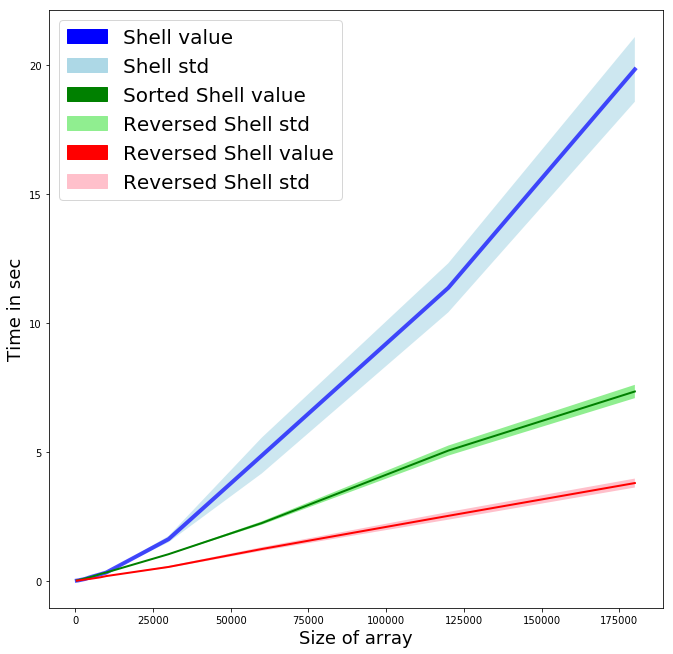

In [17]:
plt.figure(num=1, figsize=(11,11))

""" Обычный массив """
plt.plot(size_values, values_shell, 'b-', linewidth=4.0, alpha=0.7)
plt.xlabel('Size of array', fontsize=18)
plt.ylabel('Time in sec', fontsize=18)
plt.fill_between(size_values, 
                 values_shell + deviation_shell, 
                 values_shell - deviation_shell, 
                 interpolate=True, 
                 facecolor='lightblue',
                 alpha=0.6)
value_shell_patch = mpatches.Patch(color='b', label='Shell value')
std_shell_patch = mpatches.Patch(color='lightblue', label='Shell std')

""" Отсортированный массив """
plt.plot(size_values, values_shell_sorted, 'g-', linewidth=2.0)
plt.fill_between(size_values, 
                 values_shell_sorted + deviation_shell_sorted, 
                 values_shell_sorted - deviation_shell_sorted, 
                 interpolate=True, 
                 facecolor='lightgreen')
value_shell_sorted_patch = mpatches.Patch(color='g', label='Sorted Shell value')
std_shell_sorted_patch = mpatches.Patch(color='lightgreen', label='Reversed Shell std')

""" Инвертированный массив """
plt.plot(size_values, values_shell_reversed, 'r-', linewidth=2.0)
plt.fill_between(size_values, 
                 values_shell_reversed + deviation_shell_reversed, 
                 values_shell_reversed - deviation_shell_reversed, 
                 interpolate=True, 
                 facecolor='pink')
value_shell_reversed_patch = mpatches.Patch(color='r', label='Reversed Shell value')
std_shell_reversed_patch = mpatches.Patch(color='pink', label='Reversed Shell std')

plt.legend(handles=[value_shell_patch, 
                    std_shell_patch,
                    value_shell_sorted_patch,
                    std_shell_sorted_patch,
                    value_shell_reversed_patch, 
                    std_shell_reversed_patch], 
           loc=2, 
           fontsize=20)

## Выводы:
Исходя из графического представления результатов экспериментов, можно утверждать, что сортировка Шелла довольно устойчива к особым видам данных, к примеру, отсортированным. В частности, это наглядно видно исходя из того, что разброс времени сортировки уже отсортированного массива (светло-зеленый фон рядом с зеленой полосой) и разброс времени сортировки инвертированного массива (светло-розовый фон рядом с красной полосой) несущественно мал. Для сортировки Шелла довольно трудно подобрать такой случай, чтобы производительность падала хуже среднестатистического случая, как правило, эти случаи являются частными случаями для метода определения шага.

Экспериментально показано, что средняя производительность алгоритма с подбором шага по последовательности факториалов приблизительно равна $O(n^{\frac{3}{2}})$, что соответствует средней оценке сложности алгоритма Шелла с типичными шагами сортировки.